In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### THUẬT TOÁN GRADIENT DESCENT 

repeat until convergence {

$$\theta_j:=\theta_j-\alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

}
alpha là learning rate

Ta có $X\in R^{N \times M+1}$ trong đó N là số samples, M là số features có trong một sample, $y \in R^{N \times 1}$ là target value, $W \in R^{M+1 \times1}$


Ta có: 
$$L(W)=(XW-Y)^2$$ 



**1. Batch Gradient Descent**

$$J(W)=\frac{1}{2N}\sum_{i=1}^N(x_iW-y)^2$$
Gradient Descent:
$$W:=W-\alpha\frac{1}{N}X^T(XW-y)$$

**2. Stochastic Gradient Descent**

$$J(W)=\frac{1}{2}(x_iW-y_i)^2$$
Gradient Descent
$$W:=W-\alpha x_i^T(x_iW-y_i)^2$$
Nên shuffle X sau mỗi epoch



**3. Mini Gradient Descent**

$$J(W)=\frac{1}{2N_{i:i+n}}(X_{i:i+n}W-y_{i:i+n})^2$$
Gradient Descent
$$W:=W-\alpha \frac{1}{N_{i:i+n}}X_{i:i+n}^T(X_{i:i+n}W-y_{i:i+n})^2$$
Nên shuffle X sau mỗi epoch


In [3]:

class Linear_Regression:
    '''
    Linear Regression hay còn gọi là Hồi quy tuyến tính là một phương pháp dự đoán kết 
    quả dựa trên giá trị đầu vào và mối quan hệ giữa đầu vào và đầu ra trước đó.
    '''
    def __init__(self,n_iter , lr ,method = None, minibatch_sizes = None) :
        '''
        Khởi tạo tham số cho mô hình
        Tham số : 
        n_iter : số iter để chạy thuật toán Gradient Descent
        lr : tốc độ học
        method : có 3 phương pháp là Batch Gradient Descent (BGD) , Stochastic Gradient Descent (SGD) và Minibatch 
        Gradient Descent (MGD)
        minibatch_sizes : nếu phương pháp là Minibatch Gradient Descent ta cần nhập thêm số samples để train với MGD
        '''
        self.n_iter = n_iter 
        self.lr = lr 
        self.method  = method
        self.minibatch_sizes = minibatch_sizes

    def fit(self,X_train,y_train):
        '''
        Học mô hình tốt nhất trên tập huấn luyện 
        Tham số :
        X_train : Tập huấn luyện
        y_Train : label của tập huấn luyện
        '''
        
        self.X_train  = np.concatenate([np.ones((X_train.shape[0],1)),X_train],axis = 1)
        N = self.X_train.shape[0]    # số dòng của dữ liệu
        np.random.seed(1)
        W = np.random.normal(0, 1,(self.X_train.shape[1],1) )  # khởi tạo W tuân theo phân phối chuẩn
        loss = 0                      # khởi tạo loss ban đầu
        
        self.archived_W = []         # khởi tạo biến để lưu trữ giá trị W sau mỗi epoch
        self.archived_loss = []     # khởi tạo biến lưu trữ loss sau mỗi epoch
        
        self.count  = 0                   # biến để lưu số epoch
        
        if self.method == 'BGD':
            # phương pháp BATCH GRADIENT DESCENT
            print('--------------Batch GD--------------')
            for i in range(self.n_iter):
                W = W - self.lr* 1/N * np.dot(self.X_train.T, np.dot(self.X_train,W)- y_train)
                if i % 1000 == 0 :
                    loss = np.mean(np.square(np.dot(self.X_train, W) - y_train))
                    self.archived_W.append(W)
                    self.archived_loss.append(loss)
                    print("Loss at iter {}: {}".format(i,loss))
                    self.count+=1
                    
        elif self.method == 'SGD' :
            # phương pháp STOCHASTIC GRADIENT DESCENT
            print('--------------Stochastic GD--------------')
            for i in range(self.n_iter):
                randomize = np.random.permutation(self.X_train.shape[0])
                for j in randomize :
                    x_j = self.X_train[j,:].reshape(1,-1)
                    y_j = y_train[j,:].reshape(1,-1)
                    W = W - self.lr* np.dot(x_j.T, np.dot(x_j,W) - y_j)
                if i % 1000 == 0 :
                    loss = np.mean(np.square(np.dot(self.X_train,W)-y_train))
                    self.archived_W.append(W)
                    self.archived_loss.append(loss)
                    print('Loss at iter {}: {}'.format(i, loss)) 
                    self.count+=1
                    
        else :
            # phương pháp  MINI BATCH GRADIENT DESCENT
            print('--------------Mini Batch GD--------------')
            for iter_ in range(self.n_iter) :
                randomize = np.arange(len(self.X_train))
                np.random.shuffle(randomize)
                X_train_shuffle = self.X_train[randomize] 
                y_train_shuffle = y_train[randomize]
                for i in range(0,X_train_shuffle.shape[0],self.minibatch_sizes ):
                    X_train_mini = X_train_shuffle[i:i + self.minibatch_sizes]
                    y_train_mini = y_train_shuffle[i:i + self.minibatch_sizes]
                    W = W - self.lr * 1/(self.minibatch_sizes) * np.dot(X_train_mini.T, np.dot(X_train_mini,W)-y_train_mini)
                    self.minibatch_sizes = self.minibatch_sizes + 128 if self.X_train.shape[0]-self.minibatch_sizes>=128 else self.X_train.shape[0]
                if iter_ % 1000 == 0 :
                    loss = np.mean(np.square(np.dot(self.X_train,W)-y_train))
                    self.archived_W.append(W)
                    self.archived_loss.append(loss)
                    print('Loss at iter {}:  {}'.format(iter_, loss))
                    self.count+=1
                    
        self.W =W
        self.loss = np.mean(np.square(np.dot(self.X_train,self.W)- y_train))
        print("Final loss : ", self.loss)
        print("Final W: ", self.W)
        
    def predict(self,X_test):
        '''
        Dự đoán ra label của tập kiểm tra từ tham số W được học
        Tham số :
        X_test : tập kiểm tra
        Trả về :
        Label mà mô hình dự đoán của tập kiểm tra
        '''
        one = np.ones((X_test.shape[0], 1))
        self.X_test = np.concatenate((one, X_test), axis = 1)
        self.y_test_predict = np.dot(self.X_test,self.W)
        
    def plot(self):
        '''
        Vẽ đồ thị tương quan giữa số epoch và loss 
        '''
        epoch = np.arange(0,self.count)
        plt.plot(epoch,self.archived_loss)
        plt.xlabel("Epochs")
        plt.ylabel('Loss')
        plt.ylim([np.array(self.archived_loss).min()-1000,np.array(self.archived_loss).max()+1000]);

            
        

### 1. Dùng 2 thuật toán Gradient Descent còn lại để tìm bộ Weight theo Height trong data Fish

In [4]:
df=pd.read_csv("Fish.csv")

X_0 = df['Height'].values.reshape(-1,1)
y = df['Weight'].values.reshape(-1,1)






#### Stochastic GD

In [5]:
model_SGD1 = Linear_Regression(n_iter = 15000 , lr = 0.01 ,method ='SGD' )
model_SGD1.fit(X_0,y)


X_concat = model_SGD1.X_train
W_SGD1 = model_SGD1.W


archived_W_SGD1 = np.array(model_SGD1.archived_W)       # biến để lưu trữ W sử dụng SGD trong bài 1 
archived_loss_SGD1 = np.array(model_SGD1.archived_loss) # biến để lưu trữ loss sử dụng SGD trong bài 1



--------------Stochastic GD--------------
Loss at iter 0: 199276.51868153078
Loss at iter 1000: 231347.32099208544
Loss at iter 2000: 65188.9154810059
Loss at iter 3000: 66313.3089054095
Loss at iter 4000: 69325.30557273966
Loss at iter 5000: 1528719.119544775
Loss at iter 6000: 87686.67990165221
Loss at iter 7000: 246759.01419890227
Loss at iter 8000: 2533335.5124808787
Loss at iter 9000: 80258.2838162079
Loss at iter 10000: 91738.80418406149
Loss at iter 11000: 90139.93715203875
Loss at iter 12000: 102118.30886047096
Loss at iter 13000: 93502.98262278797
Loss at iter 14000: 62620.37297956955
Final loss :  68232.16028146583
Final W:  [[-211.48019886]
 [  58.25048403]]


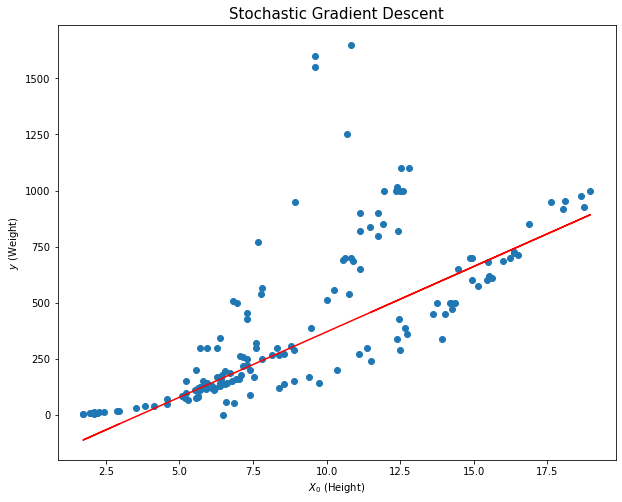

In [6]:
plt.figure(figsize = (10,8))
plt.scatter(X_0,y)
plt.plot(X_0,np.dot(X_concat,W_SGD1),"r")
plt.xlabel('$X_0$ (Height)')
plt.ylabel('$y$ (Weight)')

plt.title('Stochastic Gradient Descent',fontsize = 15);


#### Mini Batch GD

In [7]:
model_MGD1 = Linear_Regression(n_iter = 15000 , lr = 0.01 , minibatch_sizes = 50 )
model_MGD1.fit(X_0,y)


X_concat = model_MGD1.X_train
W_MGD1 = model_MGD1.W


archived_W_MGD1 = np.array(model_MGD1.archived_W)       # biến để lưu trữ W sau mỗi epoch sử dụng Minibatch GD trong bài 1 
archived_loss_MGD1 = np.array(model_MGD1.archived_loss) # biến để lưu trữ loss sau mỗi epoch sử dụng Minibatch GD trong bài 1



--------------Mini Batch GD--------------
Loss at iter 0:  64696.56622339082
Loss at iter 1000:  60634.65736393513
Loss at iter 2000:  60531.62206492484
Loss at iter 3000:  60528.99978445577
Loss at iter 4000:  60528.93304660064
Loss at iter 5000:  60528.93134810143
Loss at iter 6000:  60528.931304874095
Loss at iter 7000:  60528.93130377394
Loss at iter 8000:  60528.93130374594
Loss at iter 9000:  60528.93130374524
Loss at iter 10000:  60528.931303745216
Loss at iter 11000:  60528.931303745216
Loss at iter 12000:  60528.931303745216
Loss at iter 13000:  60528.93130374523
Loss at iter 14000:  60528.93130374524
Final loss :  60528.931303745194
Final W:  [[-144.38597115]
 [  60.49635121]]


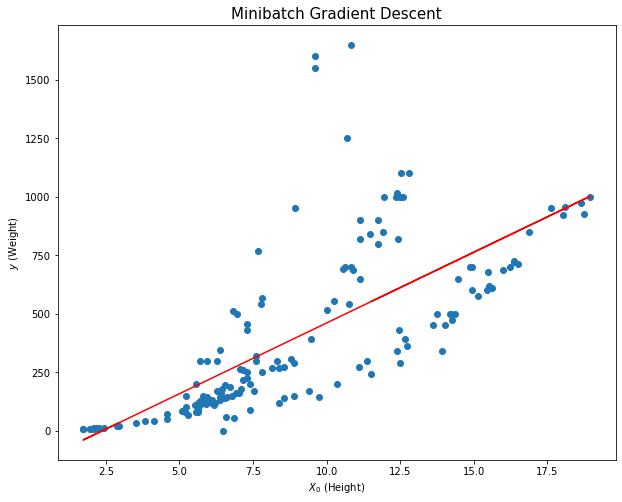

In [8]:
plt.figure(figsize = (10,8))
plt.scatter(X_0,y)
plt.plot(X_0,np.dot(X_concat,W_MGD1),"r")
plt.xlabel('$X_0$ (Height)')
plt.ylabel('$y$ (Weight)')
plt.title('Minibatch Gradient Descent',fontsize = 15);


In [9]:
import sklearn 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_0,y)

print(model.intercept_)
print(model.coef_)

[-144.38597115]
[[60.49635121]]


### 2. Dùng 3 thuật toán Gradient Descent đã học để tìm bộ Weight theo Height và Width trong data fish

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.loc[:,["Height","Width"]].values,df.loc[:,"Weight"].values,test_size=0.2,random_state=1)
y_train=y_train.reshape(-1,1)


In [11]:
import sklearn 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

[-415.4812046]
[[  1.63051922 181.33412414]]


#### Batch GD

In [12]:
model_BGD2 = Linear_Regression(n_iter = 15000, lr = 0.01, method = 'BGD')
model_BGD2.fit(X_train,y_train)

X_concat = model_BGD2.X_train
W_BGD2 = model_BGD2.W


archived_W_BGD2 = np.array(model_BGD2.archived_W)       # biến để lưu trữ W sau mỗi epoch sử dụng Batch GD trong bài 2 
archived_loss_BGD2 = np.array(model_BGD2.archived_loss) # biến để lưu trữ loss sau mỗi epoch sử dụng Batch GD trong bài 2



--------------Batch GD--------------
Loss at iter 0: 71469.80072285308
Loss at iter 1000: 26423.881637711573
Loss at iter 2000: 24553.929875188074
Loss at iter 3000: 24397.401281326613
Loss at iter 4000: 24384.298696977872
Loss at iter 5000: 24383.20191515429
Loss at iter 6000: 24383.11010652047
Loss at iter 7000: 24383.102421468575
Loss at iter 8000: 24383.101778173706
Loss at iter 9000: 24383.101724325235
Loss at iter 10000: 24383.101719817725
Loss at iter 11000: 24383.101719440412
Loss at iter 12000: 24383.101719408824
Loss at iter 13000: 24383.101719406186
Loss at iter 14000: 24383.101719405968
Final loss :  24383.101719405953
Final W:  [[-415.48120096]
 [   1.63051922]
 [ 181.33412344]]


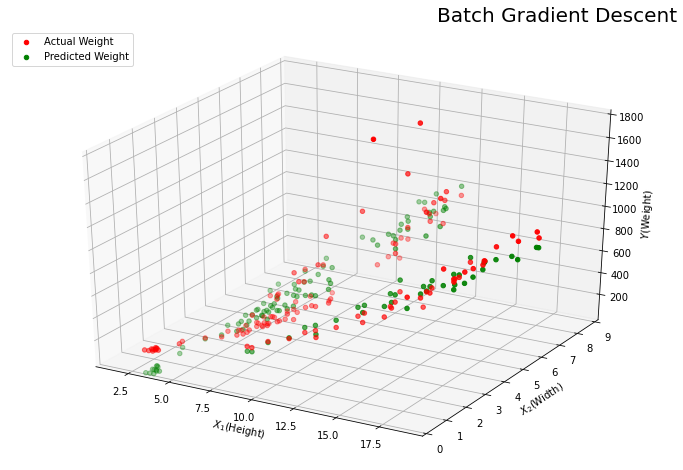

In [13]:

predictedY = np.dot(X_concat, W_BGD2)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='r', label='Actual Weight')
ax.scatter(X_train[:, 0], X_train[:, 1], predictedY, color='g', label='Predicted Weight')

ax.set_xlabel('$X_1$(Height)')
ax.set_ylabel('$X_2$(Width)')
ax.set_zlabel('$Y$(Weight)')
# ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_zlim([1,1800])
ax.set_title('Batch Gradient Descent',loc = 'right',fontsize  = 20)
ax.legend(loc="upper left")
plt.show()


#### Stochastic GD

In [14]:
model_SGD2 = Linear_Regression(n_iter = 15000, lr = 0.01, method = 'SGD')
model_SGD2.fit(X_train,y_train)


W_SGD2 = model_SGD2.W
X_concat = model_SGD2.X_train


archived_W_SGD2 = np.array(model_SGD2.archived_W)       # biến để lưu trữ W sau mỗi epoch sử dụng Stochastic GD trong bài 2 
archived_loss_SGD2 = np.array(model_SGD2.archived_loss) # biến để lưu trữ loss sau mỗi epoch sử dụng Stochastic GD trong bài 2



--------------Stochastic GD--------------
Loss at iter 0: 92310.477439306
Loss at iter 1000: 140050.69294634732
Loss at iter 2000: 235509.14372699862
Loss at iter 3000: 59761.02211188562
Loss at iter 4000: 74929.98796723448
Loss at iter 5000: 64904.427416136146
Loss at iter 6000: 140966.87476824585
Loss at iter 7000: 30220.38356734097
Loss at iter 8000: 36145.78467321264
Loss at iter 9000: 739398.6072235125
Loss at iter 10000: 2512885.0072349543
Loss at iter 11000: 34328.94094067874
Loss at iter 12000: 43226.42516084843
Loss at iter 13000: 54323.23467430398
Loss at iter 14000: 50822.44266755873
Final loss :  25521.77588971337
Final W:  [[-379.66053011]
 [   1.96284369]
 [ 167.16673992]]


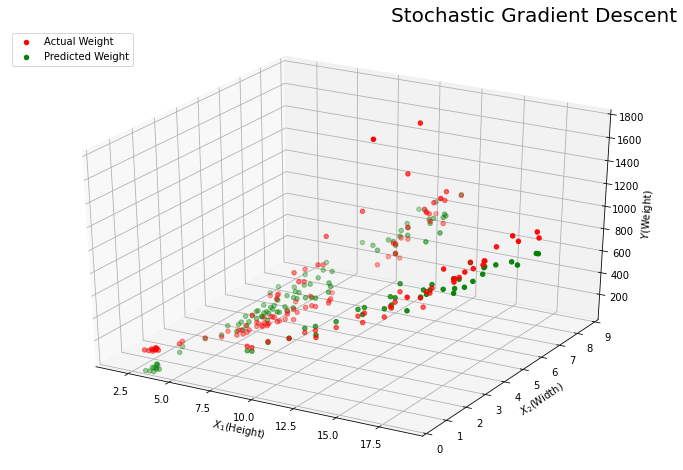

In [15]:



predictedY = np.dot(X_concat, W_SGD2)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='r', label='Actual Weight')
ax.scatter(X_train[:, 0], X_train[:, 1], predictedY, color='g', label='Predicted Weight')

ax.set_xlabel('$X_1$(Height)')
ax.set_ylabel('$X_2$(Width)')
ax.set_zlabel('$Y$(Weight)')
# ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_zlim([1,1800])
ax.set_title('Stochastic Gradient Descent',loc = 'right',fontsize  = 20)
ax.legend(loc="upper left")
plt.show()


#### Mini batch GD

In [16]:
model_MGD2 = Linear_Regression(n_iter = 15000, lr = 0.01, minibatch_sizes= 50)
model_MGD2.fit(X_train,y_train)


W_MGD2 = model_MGD2.W
X_concat = model_MGD2.X_train


archived_W_MGD2 = np.array(model_MGD2.archived_W)       # biến để lưu trữ W sau mỗi epoch sử dụng MiniBatch GD trong bài 2 
archived_loss_MGD2 = np.array(model_MGD2.archived_loss) # biến để lưu trữ loss sau mỗi epoch sử dụng MiniBatch GD trong bài 2



--------------Mini Batch GD--------------
Loss at iter 0:  61034.642029636925
Loss at iter 1000:  26420.473634008926
Loss at iter 2000:  24553.644600434996
Loss at iter 3000:  24397.37740175022
Loss at iter 4000:  24384.29669808324
Loss at iter 5000:  24383.201747832245
Loss at iter 6000:  24383.110092514413
Loss at iter 7000:  24383.102420296163
Loss at iter 8000:  24383.10177807557
Loss at iter 9000:  24383.10172431702
Loss at iter 10000:  24383.10171981704
Loss at iter 11000:  24383.101719440365
Loss at iter 12000:  24383.101719408824
Loss at iter 13000:  24383.101719406186
Loss at iter 14000:  24383.101719405968
Final loss :  24383.101719405946
Final W:  [[-415.48120097]
 [   1.63051922]
 [ 181.33412344]]


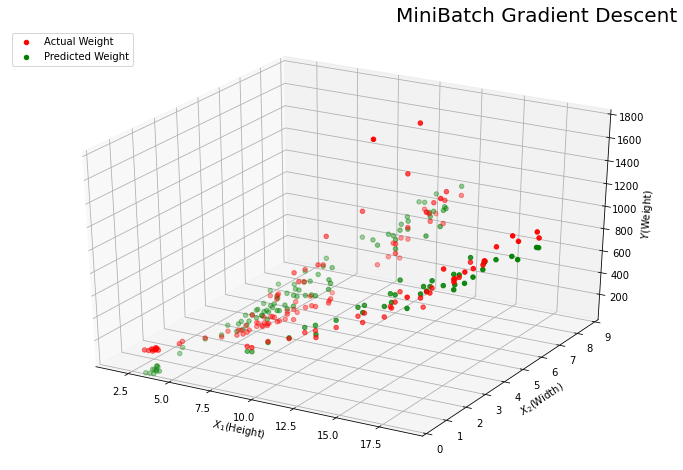

In [17]:

predictedY = np.dot(X_concat, W_MGD2)
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='r', label='Actual Weight')
ax.scatter(X_train[:, 0], X_train[:, 1], predictedY, color='g', label='Predicted Weight')

ax.set_xlabel('$X_1$(Height)')
ax.set_ylabel('$X_2$(Width)')
ax.set_zlabel('$Y$(Weight)')
# ax.set_xlim([0,9])
ax.set_ylim([0,9])
ax.set_zlim([1,1800])
ax.set_title('MiniBatch Gradient Descent',loc = 'right',fontsize  = 20)
ax.legend(loc="upper left")
plt.show()


### 3. Cho biết Weights tốt nhất cho các mô hình trên (Gợi ý: Nên lưu lại từng bộ Weights sau mỗi epoch)


#### Model ở câu 1 : 

Loss của SGD đạt giá trị thấp nhất là 62620.373 tại epoch thứ 14


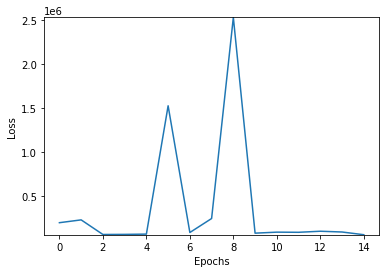

In [18]:
model_SGD1.plot()

loc1 = archived_loss_SGD1.argmin()
print('Loss của SGD đạt giá trị thấp nhất là {:.3f} tại epoch thứ {}'.format(archived_loss_SGD1[loc1],loc1))


Loss của Minibatch GD đạt giá trị thấp nhất là 60528.931 tại epoch thứ 10


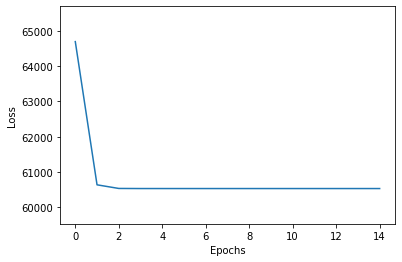

In [19]:
model_MGD1.plot()

loc2 = archived_loss_MGD1.argmin()
print('Loss của Minibatch GD đạt giá trị thấp nhất là {:.3f} tại epoch thứ {}'.format(archived_loss_MGD1[loc2],loc2))


So sánh 2 model với nhau thì ta thấy rằng Loss của Minibatch GD nhỏ hơn so với SGD nên ta chọn W của minibatch GD. 

In [20]:
# in ra W tốt nhất 
archived_W_MGD1[loc2]

array([[-144.38596955],
       [  60.49635107]])

#### Model ở câu 2 

Loss của BGD đạt giá trị thấp nhất là 24383.102 tại epoch thứ 14


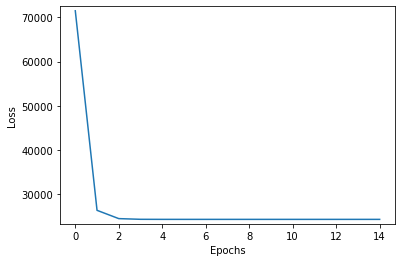

In [21]:
model_BGD2.plot()

loc1 = archived_loss_BGD2.argmin()
print('Loss của BGD đạt giá trị thấp nhất là {:.3f} tại epoch thứ {}'.format(archived_loss_BGD2[loc1],loc1))


Loss của SGD đạt giá trị thấp nhất là 30220.384 tại epoch thứ 7


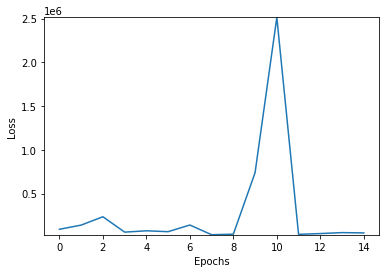

In [22]:
model_SGD2.plot()

loc2 = archived_loss_SGD2.argmin()
print('Loss của SGD đạt giá trị thấp nhất là {:.3f} tại epoch thứ {}'.format(archived_loss_SGD2[loc2],loc2))


Loss của MGD đạt giá trị thấp nhất là 24383.102 tại epoch thứ 14


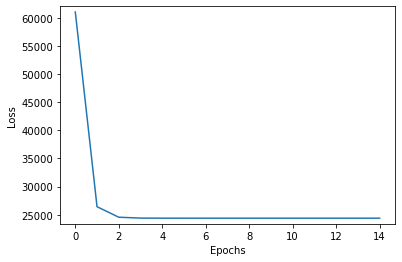

In [23]:
model_MGD2.plot()

loc3 = archived_loss_MGD2.argmin()
print('Loss của MGD đạt giá trị thấp nhất là {:.3f} tại epoch thứ {}'.format(archived_loss_MGD2[loc3],loc3))


Ở đây ta nhận ra rằng loss của MGD và BGD là tốt nhất.

In [24]:
# in ra W tốt nhất 
archived_W_MGD2[loc3]

array([[-415.48119207],
       [   1.63051921],
       [ 181.33412172]])